In [1]:
import sys
import os

project_path = 'c:/Users/Firew Ayele/Desktop/kifiya/telecom_analysis'
sys.path.append(project_path)

import pandas as pd
from Database.db_connection import fetch_data_from_postgres
from src.utils import missing_values_table, convert_bytes_to_megabytes

fetch data from postgres

In [2]:
df =fetch_data_from_postgres()
print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [6]:
df['HTTP DL (MB)'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



Task 3.1

Average TCP Retransmission

In [10]:

average_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().sum(axis=1)


Average RTT

In [11]:
average_rtt = df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().sum(axis=1)


Handset Type

In [12]:
most_frequent_handset_type = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.value_counts().index[0])


 Average Throughput

In [13]:
average_throughput = df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().sum(axis=1)


Aggregate all information into a DataFrame


In [14]:
customer_engagement_metrics = pd.DataFrame({
    'MSISDN/Number': average_tcp_retransmission.index,
    'Average TCP Retransmission': average_tcp_retransmission.values,
    'Average RTT': average_rtt.values,
    'Handset Type': most_frequent_handset_type.values,
    'Average Throughput': average_throughput.values
})

# Display the aggregated information
print(customer_engagement_metrics.head())

   MSISDN/Number  Average TCP Retransmission  Average RTT  \
0   3.360100e+10                         0.0         46.0   
1   3.360100e+10                         0.0         31.0   
2   3.360100e+10                         0.0          0.0   
3   3.360101e+10                      1066.0         84.0   
4   3.360101e+10                   9370832.0         59.5   

                     Handset Type  Average Throughput  
0  Huawei P20 Lite Huawei Nova 3E                76.0  
1          Apple iPhone 7 (A1778)                99.0  
2                       undefined                97.0  
3         Apple iPhone 5S (A1457)               248.0  
4         Apple iPhone Se (A1723)             28422.0  


Task 3.2

Top 10 TCP values:

In [26]:
top_tcp = df['TCP DL Retrans. Vol (Bytes)'].value_counts().nlargest(10)
print("Top 10 TCP values:")
print(top_tcp)

Top 10 TCP values:
TCP DL Retrans. Vol (Bytes)
1330.0    433
2660.0    219
38.0      200
92.0      192
1318.0    156
543.0     133
3990.0    114
76.0      108
5320.0    102
1288.0     93
Name: count, dtype: int64


Bottom 10 TCP values

In [29]:
bottom_tcp = df['TCP DL Retrans. Vol (Bytes)'].value_counts().nsmallest(10)
print("\nBottom 10 TCP values:")
print(bottom_tcp)


Bottom 10 TCP values:
TCP DL Retrans. Vol (Bytes)
18968254.0    1
11307841.0    1
599416.0      1
3483782.0     1
808697.0      1
2440307.0     1
5598958.0     1
2281.0        1
290615.0      1
2638453.0     1
Name: count, dtype: int64


Most frequent TCP value

In [44]:
most_freq_tcp = df['TCP DL Retrans. Vol (Bytes)'].mode().iloc[0]
print("\nMost frequent TCP value:", most_freq_tcp)


Most frequent TCP value: 1330.0


Top 10 RTT values

In [49]:
top_rtt = df['Avg RTT DL (ms)'].value_counts().nlargest(10)
print("top 10 RRT Values\n",top_rtt)

top 10 RRT Values
 Avg RTT DL (ms)
28.0    3553
27.0    3380
34.0    3296
35.0    2892
37.0    2718
36.0    2645
38.0    2547
29.0    2498
26.0    2488
33.0    2430
Name: count, dtype: int64


Bottom 10 RTT values

In [51]:
bottom_rtt = df['Avg RTT DL (ms)'].value_counts().nsmallest(10)
print("Bottom 10 RRT Values\n",bottom_rtt)

Bottom 10 RRT Values
 Avg RTT DL (ms)
4274.0    1
2743.0    1
686.0     1
526.0     1
1512.0    1
2930.0    1
1959.0    1
2559.0    1
1553.0    1
3774.0    1
Name: count, dtype: int64


Most frequent RTT value

In [57]:
most_freq_rtt = df['Avg RTT DL (ms)'].mode().iloc[0]
print("Most frequent RTT value:",most_freq_rtt)


Most frequent RTT value: 28.0


Top 10 Throughput values

In [60]:
top_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().nlargest(10)
print("Top 10 Throughput values\n:",top_throughput)

Top 10 Throughput values
: Avg Bearer TP DL (kbps)
23.0    7324
43.0    4352
44.0    4186
6.0     3983
22.0    2867
48.0    2778
63.0    2757
42.0    2689
45.0    2644
47.0    2263
Name: count, dtype: int64


Bottom 10 Throughput

In [63]:
bottom_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().nsmallest(10)
print("Bottom 10 Throughput:\n",bottom_throughput)

Bottom 10 Throughput:
 Avg Bearer TP DL (kbps)
63420.0     1
28305.0     1
89619.0     1
61776.0     1
21029.0     1
46396.0     1
64866.0     1
13724.0     1
65345.0     1
186737.0    1
Name: count, dtype: int64


Most frequent Throughput value

In [69]:
most_freq_throughput = df['Avg Bearer TP DL (kbps)'].mode().iloc[0]
print("Most frequent Throughput value:",most_freq_throughput)

Most frequent Throughput value: 23.0


Distribution of Throughput per Handset Type

In [73]:
average_throughput_per_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean()
print("Distribution of average throughput per handset type:")
print(average_throughput_per_handset)

Distribution of average throughput per handset type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23184.000000
A-Link Telecom I. Cubot Note Plus                                                       6527.000000
A-Link Telecom I. Cubot Note S                                                          8515.000000
A-Link Telecom I. Cubot Nova                                                           55667.000000
A-Link Telecom I. Cubot Power                                                          69126.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.500000
Zyxel Communicat. Lte7460                                                              39741.000000
Zyxel Communicat. Sbg3600                                                              82818.000000
Zyxel Communicat. Zyxel Wah7706   

The average TCP retransmission view per handset type

In [74]:
average_tcp_retransmission_per_handset = df.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().sum(axis=1)
print("\nAverage TCP retransmission per handset type:")
print(average_tcp_retransmission_per_handset)


Average TCP retransmission per handset type:
Handset Type
A-Link Telecom I. Cubot A5                                                             0.000000e+00
A-Link Telecom I. Cubot Note Plus                                                      6.162130e+05
A-Link Telecom I. Cubot Note S                                                         4.141173e+07
A-Link Telecom I. Cubot Nova                                                           1.371700e+05
A-Link Telecom I. Cubot Power                                                          8.041000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    2.660000e+03
Zyxel Communicat. Lte7460                                                              4.127655e+07
Zyxel Communicat. Sbg3600                                                              5.348694e+07
Zyxel Communicat. Zyxel Wah7706          

Task 3.4

Using the experience metrics above

   MSISDN/Number  Cluster
0   3.360100e+10        1
1   3.360100e+10        1
2   3.360100e+10        1
3   3.360101e+10        1
4   3.360101e+10        1


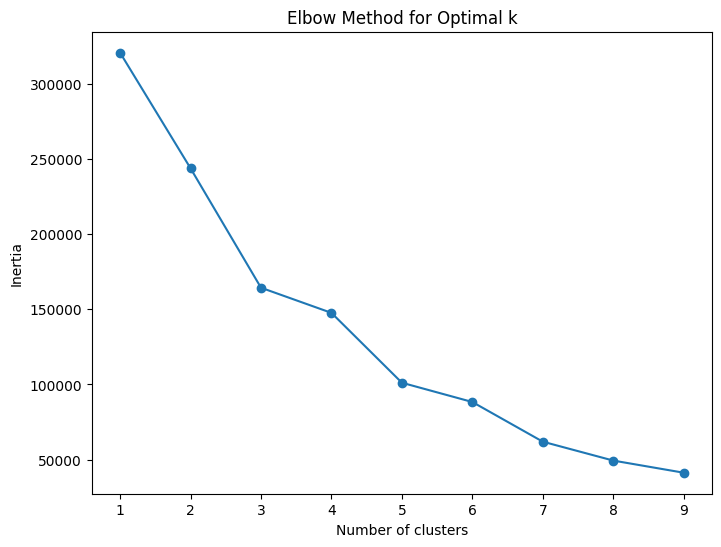

  Cluster Average TCP Retransmission                              \
                                 min           max          mean   
0       0               1.110387e+09  4.301477e+09  2.200928e+09   
1       1               0.000000e+00  1.010524e+09  1.355228e+06   
2       2               0.000000e+00  1.101753e+09  1.920380e+07   

                Average RTT                                     \
            sum         min      max        mean           sum   
0  3.719569e+11        52.0    572.0  143.442406  2.424177e+04   
1  1.197344e+11         0.0  96924.0  114.302041  1.009859e+07   
2  3.521402e+11         0.0   8296.5  102.789338  1.884848e+06   

  Average Throughput                                        
                 min       max          mean           sum  
0            15990.0  181839.0  71432.373077  1.207207e+07  
1                0.0   29906.0   4332.711277  3.827950e+08  
2            16482.0  283931.0  55112.434820  1.010597e+09  


In [87]:
# select the relevant columns
relevant_columns = customer_engagement_metrics[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']]

scaler = StandardScaler()
agg_data_scaled = scaler.fit_transform(relevant_columns)



# perform a k-means clustering (where k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_engagement_metrics['Cluster'] = kmeans.fit_predict(agg_data_scaled)

# Display cluster assignments
print(customer_engagement_metrics[['MSISDN/Number', 'Cluster']].head())

# Elbow Method to determine the optimal value of k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(agg_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Analyzing cluster 
cluster_summary = customer_engagement_metrics.groupby('Cluster').agg({
    'Average TCP Retransmission': ['min', 'max', 'mean', 'sum'],
    'Average RTT': ['min', 'max', 'mean', 'sum'],
    'Average Throughput': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_summary)
